# ExpIF model

Exponential integrate-and-fire model is a cononical spiking model, simply describes single neuron behavior.

In [1]:
import brainpy as bp
import bpmodels
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# set global params
dt = 0.125  # update variables per <dt> ms
duration = 350.  # simulate duration
bp.profile.set(jit=True, dt=dt, merge_steps=True, show_code=False)

Import ExpIF neuron model from bpmodels package. Build and simulate a group of ExpIF neuron.

In [3]:
# define neuron type
Exp_LIF_neuron = bpmodels.neurons.get_ExpIF()

# build neuron group
neu = bp.NeuGroup(Exp_LIF_neuron, geometry=(10,), monitors=['V'])
neu.runner.set_schedule(['input', 'update', 'monitor', 'reset'])
neu.pars['V_rest'] = np.random.randint(-65, -63, size=(10,))
neu.pars['tau'] = np.random.randint(5, 10, size=(10,))
neu.pars['noise'] = 1.

# create input
current, pos_dur = bp.inputs.constant_current([(0.30, duration)])

# simulate
neu.run(duration=pos_dur, inputs=["ST.input", current], report=False)
# simulate for 100 ms. Give external input = current

Paint V-t plot during the simulation in neurons. Membrane potential rising, neuron spiking can be seen.

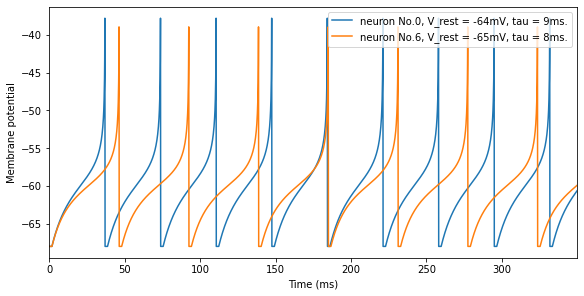

In [4]:
# paint
ts = neu.mon.ts
fig, gs = bp.visualize.get_figure(1, 1, 4, 8)
fig.add_subplot(gs[0, 0])
plt.plot(ts, neu.mon.V[:, 0],
         label=f'neuron No.{0}, V_rest = {neu.pars.get("V_rest")[0]}mV, tau = {neu.pars.get("tau")[0]}ms.')
plt.plot(ts, neu.mon.V[:, 6],
         label=f'neuron No.{6}, V_rest = {neu.pars.get("V_rest")[6]}mV, tau = {neu.pars.get("tau")[6]}ms.')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential')
plt.xlim(-0.1, ts[-1] + 0.1)
plt.legend()
plt.show()